<a href="https://colab.research.google.com/github/WesleyKhoiVo/DeepLearning/blob/main/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


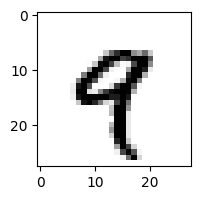

Label: 9


In [20]:
import matplotlib
import matplotlib.pyplot as plt

image = mnist.data[4].reshape((28,28))
label =  mnist.target[4]

plt.figure(figsize = (15,2))
imgplot = plt.imshow(image,cmap=plt.cm.binary)
plt.show()
print("Label:",label)

In [21]:
import numpy as np
mnist.data = np.reshape(mnist.data,(-1,28,28,1))
mnist.data.shape

(70000, 28, 28, 1)

In [22]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [23]:
#Convert to one-hot vector
#For example, label '0' => [1,0,0,0,0,0,0,0,0,0,0], '1' => [0,1,0,0,0,0,0,0,0,0,0], ...
from tensorflow.keras.utils import to_categorical
train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [24]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow as tf
import datetime

input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(50,(3,3),activation="relu",padding="same")(input_layer)
pooling_layer = MaxPooling2D((2,2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer2 = Dense(10, activation="softmax")(flatten_layer)

model = Model(inputs=input_layer, outputs=dense_layer2)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])
model.summary()


log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_img,train_lbl,validation_data=(test_img,test_lbl), epochs= 10, batch_size=2000,callbacks=[tensorboard_callback])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 10)                98010     
                                                                 
Total params: 98,510
Trainable params: 98,510
Non-trainable params: 0
_________________________________________________________

In [29]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 40455), started 0:02:14 ago. (Use '!kill 40455' to kill it.)

<IPython.core.display.Javascript object>

In [26]:
model.save_weights("weights.h5")
model.save("model.h5",include_optimizer=False)

In [27]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(50,(3,3),activation="relu",padding="same")(input_layer)
pooling_layer = MaxPooling2D((2,2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer2 = Dense(10, activation="softmax")(flatten_layer)

saved_model = Model(inputs=input_layer, outputs=dense_layer2)

saved_model.load_weights("weights.h5")

In [28]:
from tensorflow.keras.models import load_model
new_model = load_model('model.h5')
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 10)                98010     
                                                                 
Total params: 98,510
Trainable params: 98,510
Non-trainable params: 0
_________________________________________________________